# TD-6 DE MODELISATION DE L'INCERTITUDE
# DEVOIR DE MOSBAH YASMIN (MASTER 2 IA2)

In [1]:
#!pip3 install -U scikit-fuzzy

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x_res = np.arange(0, 21, 1)
x_met = np.arange(0, 21, 1)
x_pres = np.arange(0, 21, 1)
x_glob = np.arange(0, 21, 1)

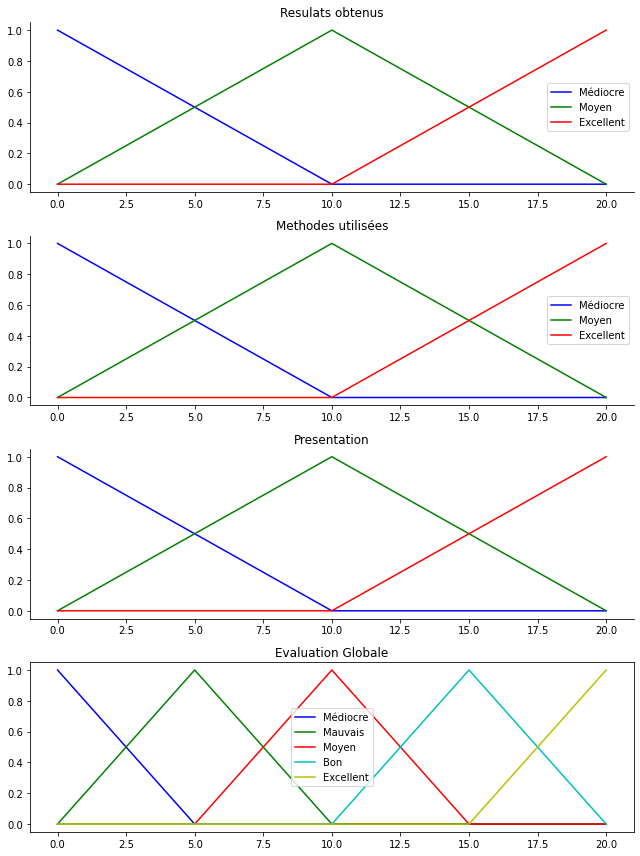

In [3]:
# 1. Définissez les fonctions d’appartenance de valeurs linguistiques pour chaque variable.

res_lo = fuzz.trimf(x_res, [0, 0, 10])
res_md = fuzz.trimf(x_res, [0, 10, 20])
res_hi = fuzz.trimf(x_res, [10, 20, 20])

met_lo = fuzz.trimf(x_met, [0, 0, 10])
met_md = fuzz.trimf(x_met, [0, 10, 20])
met_hi = fuzz.trimf(x_met, [10, 20, 20])

pres_lo = fuzz.trimf(x_pres, [0, 0, 10])
pres_md = fuzz.trimf(x_pres, [0, 10, 20])
pres_hi = fuzz.trimf(x_pres, [10, 20, 20])


glob_med = fuzz.trimf(x_glob, [0, 0, 5])
glob_mauv = fuzz.trimf(x_glob, [0, 5, 10])
glob_moy = fuzz.trimf(x_glob, [5, 10, 15])
glob_bon = fuzz.trimf(x_glob, [10, 15, 20])
glob_exc = fuzz.trimf(x_pres, [15, 20, 20])



fig, (ax0, ax1, ax2,ax3) = plt.subplots(nrows=4, figsize=(9, 12))
ax0.plot(x_res, res_lo, 'b', linewidth=1.5, label='Médiocre')
ax0.plot(x_res, res_md, 'g', linewidth=1.5, label='Moyen')
ax0.plot(x_res, res_hi, 'r', linewidth=1.5, label='Excellent')
ax0.set_title('Resulats obtenus')
ax0.legend()

ax1.plot(x_met, met_lo, 'b', linewidth=1.5, label='Médiocre')
ax1.plot(x_met, met_md, 'g', linewidth=1.5, label='Moyen')
ax1.plot(x_met, met_hi, 'r', linewidth=1.5, label='Excellent')
ax1.set_title('Methodes utilisées')
ax1.legend()

ax2.plot(x_pres, pres_lo, 'b', linewidth=1.5, label='Médiocre')
ax2.plot(x_pres, pres_md, 'g', linewidth=1.5, label='Moyen')
ax2.plot(x_pres, pres_hi, 'r', linewidth=1.5, label='Excellent')
ax2.set_title('Presentation')



ax3.plot(x_glob, glob_med , 'b', linewidth=1.5, label='Médiocre')
ax3.plot(x_glob, glob_mauv , 'g', linewidth=1.5, label='Mauvais')
ax3.plot(x_glob, glob_moy , 'r', linewidth=1.5, label='Moyen')
ax3.plot(x_glob, glob_bon , 'c', linewidth=1.5, label='Bon')
ax3.plot(x_glob, glob_exc , 'y', linewidth=1.5, label='Excellent')


ax3.set_title('Evaluation Globale')

ax3.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [4]:
#4. Soit un rapport de stage avec les notes :
#— Résultats obtenus : 12,
#— Méthodes utilisées : 6,
#— Présentation : 19 ;

res_level_lo = fuzz.interp_membership(x_res, res_lo, 12.0)
res_level_md = fuzz.interp_membership(x_res, res_md, 12.0)
res_level_hi = fuzz.interp_membership(x_res, res_hi, 12.0)

met_level_lo = fuzz.interp_membership(x_met, met_lo, 6.0)
met_level_md = fuzz.interp_membership(x_met, met_md, 6.0)
met_level_hi = fuzz.interp_membership(x_met, met_hi, 6.0)

pres_level_lo = fuzz.interp_membership(x_pres, pres_lo, 19.0)
pres_level_md = fuzz.interp_membership(x_pres, pres_md, 19.0)
pres_level_hi = fuzz.interp_membership(x_pres, pres_hi, 19.0)

In [5]:
#J'ai utilisé des régles normalisées comme énoncé dans la consigne

#R1 : Si Résultat est Moyen ET Méthodes est Médiocre ALORS Evaluation est Mauvais
rule1 = np.fmin(res_level_md, met_level_lo)
res_1 = np.fmin(rule1, glob_mauv)

#R2 : : Si Résultat est Moyen ET Méthodes est Excellent ALORS Evaluation est Bon
rule2 = np.fmin(res_level_md, met_level_hi)

#R3 : : Si Résultat est Médiocre ET Méthodes est Moyen ALORS Evaluation est Mauvais
rule3 = np.fmin(res_level_lo, met_level_md)
res_3 = np.fmin(rule3, glob_mauv)

#R4 : : Si Résultat est Excellent ET Méthodes est Excellent ET Présentation est Excellent ALORS Evaluation est Excellent
rule4 = np.fmin(res_level_hi, met_level_hi)
rule4_2 = np.fmin(rule4, pres_level_hi)

#R5 : : Si Résultat est Médiocre OU Méthodes est Moyen ALORS Evaluation est Moyen
#DONC Je normalise ca va me donner :
#  Si Résultat est Médiocre  ALORS Evaluation est Moyen
#  Si Méthodes est Moyen ALORS Evaluation est Moyen
res_5 = np.fmin(res_level_lo, glob_moy)
res_5_2 = np.fmin(met_level_md, glob_moy)

#R6 : : Si Résultat est Moyen OU Méthodes est Médiocre ALORS Evaluation est Médiocre
#donc :
# Si Résultat est Moyen  ALORS Evaluation est Médiocre
# Si Méthodes est Médiocre ALORS Evaluation est Médiocre
res_6 = np.fmin(res_level_md, glob_med)
res_6_2 = np.fmin(met_level_lo, glob_med)


glob_act_med = np.fmax(res_6,res_6_2)
glob_act_mauv = np.fmax(res_3,res_1)
glob_act_moy = np.fmax(res_5,res_5_2)
glob_act_bon = np.fmin(rule2, glob_bon)
glob_act_exc = np.fmin(rule4_2, glob_exc)

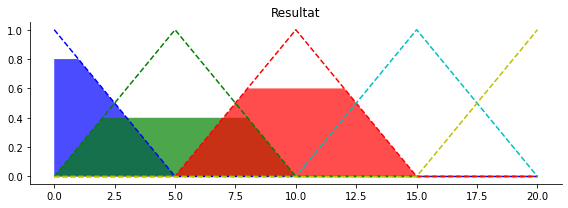

In [6]:
res0= np.zeros_like(x_glob)


fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_glob, res0, glob_act_med , facecolor='b', alpha=0.7)
ax0.plot(x_glob, glob_med, 'b', linewidth=1.5, linestyle='--', )
ax0.fill_between(x_glob, res0, glob_act_mauv , facecolor='g', alpha=0.7)
ax0.plot(x_glob, glob_mauv, 'g', linewidth=1.5, linestyle='--')
ax0.fill_between(x_glob, res0, glob_act_moy, facecolor='r', alpha=0.7)
ax0.plot(x_glob, glob_moy, 'r', linewidth=1.5, linestyle='--')
ax0.fill_between(x_glob, res0, glob_act_bon, facecolor='y', alpha=0.7)
ax0.plot(x_glob, glob_bon, 'c', linewidth=1.5, linestyle='--')
ax0.fill_between(x_glob, res0, glob_act_exc, facecolor='c', alpha=0.7)
ax0.plot(x_glob, glob_exc, 'y', linewidth=1.5, linestyle='--')
ax0.set_title('Resultat')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()


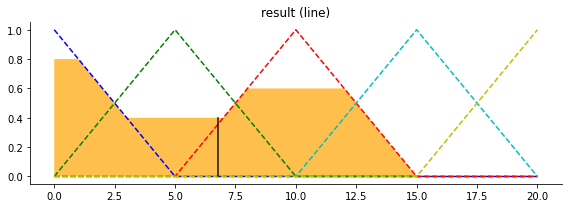

In [7]:
aggregated = np.fmax(glob_act_med,
np.fmax(glob_act_mauv,
glob_act_moy,),
np.fmax(glob_act_bon,
glob_act_exc))

# Calculate defuzzified result
glob = fuzz.defuzz(x_glob, aggregated, 'centroid')
glob_res = fuzz.interp_membership(x_glob, aggregated, glob)


fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_glob, glob_med, 'b', linewidth=1.5, linestyle='--', )
ax0.plot(x_glob, glob_mauv, 'g', linewidth=1.5, linestyle='--')
ax0.plot(x_glob, glob_moy, 'r', linewidth=1.5, linestyle='--')
ax0.plot(x_glob, glob_bon, 'c', linewidth=1.5, linestyle='--')
ax0.plot(x_glob, glob_exc, 'y', linewidth=1.5, linestyle='--')


ax0.fill_between(x_glob, res0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([glob, glob], [0, glob_res], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('result (line)')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

5. **Que dites-vous de cette base de règles ? Est-elle bien établie ?**

# Je pense que la base de règle est mal établie car le résultat obtenu est bien trop mauvais pour les notes qu'a reçu l'eleve. 


6. **Essayez des définitions alternatives des valeurs linguistique ; changez la méthode de défuzzification. Que’est-ce que vous pouvez constater?**

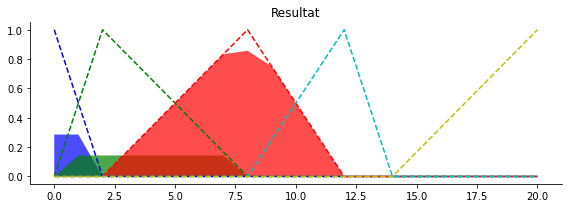

In [12]:
#On essaie des définition alternatices des valeurs linguistique :

res_lo = fuzz.trimf(x_res, [0, 0, 7])
res_md = fuzz.trimf(x_res, [0, 7, 14])
res_hi = fuzz.trimf(x_res, [7, 14, 20])

met_lo = fuzz.trimf(x_met, [0, 0, 7])
met_md = fuzz.trimf(x_met, [0, 7, 14])
met_hi = fuzz.trimf(x_met, [7, 14, 20])

pres_lo = fuzz.trimf(x_pres, [0, 0, 7])
pres_md = fuzz.trimf(x_pres, [0, 7, 14])
pres_hi = fuzz.trimf(x_pres, [7, 14, 20])


glob_med = fuzz.trimf(x_glob, [0, 0, 2])
glob_mauv = fuzz.trimf(x_glob, [0, 2, 8])
glob_moy = fuzz.trimf(x_glob, [2, 8, 12])
glob_bon = fuzz.trimf(x_glob, [8, 12, 14])
glob_exc = fuzz.trimf(x_pres, [14, 20, 20])

#On garde les mêmes notes a tester pour pouvoir constater la différence
res_level_lo = fuzz.interp_membership(x_res, res_lo, 12.0)
res_level_md = fuzz.interp_membership(x_res, res_md, 12.0)
res_level_hi = fuzz.interp_membership(x_res, res_hi, 12.0)

met_level_lo = fuzz.interp_membership(x_met, met_lo, 6.0)
met_level_md = fuzz.interp_membership(x_met, met_md, 6.0)
met_level_hi = fuzz.interp_membership(x_met, met_hi, 6.0)

pres_level_lo = fuzz.interp_membership(x_pres, pres_lo, 19.0)
pres_level_md = fuzz.interp_membership(x_pres, pres_md, 19.0)
pres_level_hi = fuzz.interp_membership(x_pres, pres_hi, 19.0)



#On redefinie les regles :

rule1 = np.fmin(res_level_md, met_level_lo)
res_1 = np.fmin(rule1, glob_mauv)
rule2 = np.fmin(res_level_md, met_level_hi)
rule3 = np.fmin(res_level_lo, met_level_md)
res_3 = np.fmin(rule3, glob_mauv)
rule4 = np.fmin(res_level_hi, met_level_hi)
rule4_2 = np.fmin(rule4, pres_level_hi)
res_5 = np.fmin(res_level_lo, glob_moy)
res_5_2 = np.fmin(met_level_md, glob_moy)
res_6 = np.fmin(res_level_md, glob_med)
res_6_2 = np.fmin(met_level_lo, glob_med)
glob_act_med = np.fmax(res_6,res_6_2)
glob_act_mauv = np.fmax(res_3,res_1)
glob_act_moy = np.fmax(res_5,res_5_2)
glob_act_bon = np.fmin(rule2, glob_bon)
glob_act_exc = np.fmin(rule4_2, glob_exc)

res0= np.zeros_like(x_glob)
##Affichage du graph :

fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_glob, res0, glob_act_med , facecolor='b', alpha=0.7)
ax0.plot(x_glob, glob_med, 'b', linewidth=1.5, linestyle='--', )
ax0.fill_between(x_glob, res0, glob_act_mauv , facecolor='g', alpha=0.7)
ax0.plot(x_glob, glob_mauv, 'g', linewidth=1.5, linestyle='--')
ax0.fill_between(x_glob, res0, glob_act_moy, facecolor='r', alpha=0.7)
ax0.plot(x_glob, glob_moy, 'r', linewidth=1.5, linestyle='--')
ax0.fill_between(x_glob, res0, glob_act_bon, facecolor='y', alpha=0.7)
ax0.plot(x_glob, glob_bon, 'c', linewidth=1.5, linestyle='--')
ax0.fill_between(x_glob, res0, glob_act_exc, facecolor='c', alpha=0.7)
ax0.plot(x_glob, glob_exc, 'y', linewidth=1.5, linestyle='--')
ax0.set_title('Resultat')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

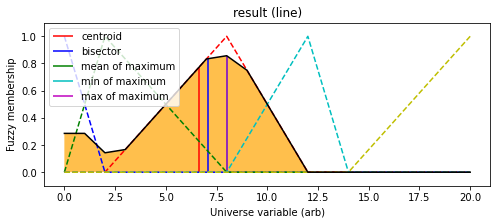

In [13]:
#Changement de défuzzification :

aggregated = np.fmax(glob_act_med,
np.fmax(glob_act_mauv,
glob_act_moy,),
np.fmax(glob_act_bon,
glob_act_exc))

#On tente avec plusieur methode de défuzzification :
glob = fuzz.defuzz(x_glob, aggregated, 'centroid')
glob_bisector = fuzz.defuzz(x_glob, aggregated, 'bisector')
glob_mom = fuzz.defuzz(x_glob, aggregated, 'mom')
glob_som = fuzz.defuzz(x_glob, aggregated, 'som')
glob_lom = fuzz.defuzz(x_glob, aggregated, 'lom')

# Collect info for vertical lines
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum',
          'max of maximum']
xvals = [glob,
         glob_bisector,
         glob_mom,
         glob_som,
         glob_lom]


colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(x_glob, aggregated, i) for i in xvals]

glob_res = fuzz.interp_membership(x_glob, aggregated, glob)


#Visualisation du resultat
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.plot(x_glob, glob_med, 'b', linewidth=1.5, linestyle='--', )
ax0.plot(x_glob, glob_mauv, 'g', linewidth=1.5, linestyle='--')
ax0.plot(x_glob, glob_moy, 'r', linewidth=1.5, linestyle='--')
ax0.plot(x_glob, glob_bon, 'c', linewidth=1.5, linestyle='--')
ax0.plot(x_glob, glob_exc, 'y', linewidth=1.5, linestyle='--')

ax0.fill_between(x_glob, res0, aggregated, facecolor='Orange', alpha=0.7)

colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(x_glob, aggregated, i) for i in xvals]

ax0.set_title('result (line)')


plt.plot(x_glob, aggregated, 'k')
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
plt.ylabel('Fuzzy membership')
plt.xlabel('Universe variable (arb)')
plt.ylim(-0.1, 1.1)
plt.legend(loc=2)

plt.show()


# Le resultat change avec une définition alternatives des valeurs linguistique.
# On voit aussi que lorsqu'on change de methode de defuzzification on récupérer des résultats légegerment différent. 